In [1]:
%matplotlib inline 

from imports import *

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


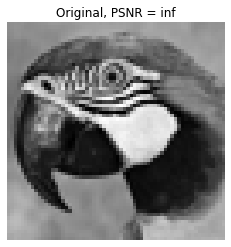

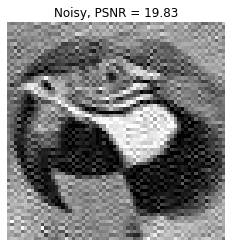

In [11]:
problem = Deblur(img_path='./data/Set12/07.png', kernel_path='./deblurring/kernel.png', H=64, W=64, sigma=1, subsampling=2)
psnr_display(img_path='./data/Set12/07.png', output=problem.original, title="Original", H=64, W=64)

psnr_display(img_path='./data/Set12/07.png', output=problem.noisy, title="Noisy", H=64, W=64)

19859.29384444472
After gradient update: 0 0 19.83047983027403
After denoising update: 0 0 19.93520062247019

After gradient update: 1 0 19.934210660238247
After denoising update: 1 0 20.061460828643032

After gradient update: 2 0 19.982473356354312
After denoising update: 2 0 20.124928764570207

After gradient update: 3 0 15.173612817051982
After denoising update: 3 0 15.205866271410848

After gradient update: 4 0 -4.169014028418516
After denoising update: 4 0 -4.168820756060747

After gradient update: 5 0 -25.271447491004587
After denoising update: 5 0 -25.271438646261252

After gradient update: 6 0 -46.469472260278465
After denoising update: 6 0 -46.469472260278465

After gradient update: 7 0 -67.719300805254
After denoising update: 7 0 -67.719300805254

After gradient update: 8 0 -89.00476518197807
After denoising update: 8 0 -89.00476518197807

After gradient update: 9 0 -110.31559951453744
After denoising update: 9 0 -110.31559951453744

After gradient update: 10 0 -131.644747918

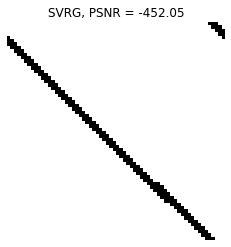

In [12]:
denoiser = NLMDenoiser(filter_decay=0.999,
                       filter_size=0.03, patch_size=5, patch_distance=12, multichannel=True)

L = np.linalg.norm(problem.SCb, 'f')
print(L)

svrg_out, svrg_time, svrg_psnr, svrg_zs = pnp_svrg(problem=problem,
                                                   denoiser=denoiser,
                                                   eta=.000001, tt=5, T2=1, 
                                                   mini_batch_size=problem.num_meas, verbose=True)

psnr_display(img_path='./data/Set12/07.png', output=svrg_out.reshape(64,64), title="SVRG", H=64, W=64)